In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_table(r'C:\Users\IT\Downloads\Airfares.txt',delim_whitespace=True,header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [4]:
data.shape

(1000, 11)

In [5]:
# 0 City1
# 1 City2
# 2 Average_Fare
# 3 Distance
# 4 Avg_weekly_pas
# 5 Leading_Airline
# 6 Leading_Airline_share
# 7 Avg_fare_lead
# 8 Low_price_airline
# 9 Low_airline_share
# 10 Avg_fare_low

In [6]:
data.columns= ['City1','City2','Avg_Fare','Distance','Avg_weekly_pas',
              'Leading_Airline','Leading_Airline_share','Avg_Fare_lead',
              'Low_price_Airline','Low_airline_share','Avg_fare_low']

In [7]:
data.head()

,City1,City2,Avg_Fare,Distance,Avg_weekly_pas,Leading_Airline,Leading_Airline_share,Avg_Fare_lead,Low_price_Airline,Low_airline_share,Avg_fare_low
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City1                  1000 non-null   object 
 1   City2                  1000 non-null   object 
 2   Avg_Fare               1000 non-null   float64
 3   Distance               1000 non-null   int64  
 4   Avg_weekly_pas         1000 non-null   float64
 5   Leading_Airline        1000 non-null   object 
 6   Leading_Airline_share  1000 non-null   float64
 7   Avg_Fare_lead          1000 non-null   float64
 8   Low_price_Airline      1000 non-null   object 
 9   Low_airline_share      1000 non-null   float64
 10  Avg_fare_low           1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Avg_weekly_pas,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
Leading_Airline_share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Avg_Fare_lead,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
Low_airline_share,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
Avg_fare_low,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [10]:
data.describe(include='object').T

,count,unique,top,freq
City1,1000,90,ATL,64
City2,1000,85,TPA,46
Leading_Airline,1000,16,WN,257
Low_price_Airline,1000,19,WN,230


## UNIVARIATE ANALYSIS

In [11]:
num_cols = data.select_dtypes(include=np.number).columns

In [12]:
num_cols

Index(['Avg_Fare', 'Distance', 'Avg_weekly_pas', 'Leading_Airline_share',
       'Avg_Fare_lead', 'Low_airline_share', 'Avg_fare_low'],
      dtype='object')

		UNIVARIATE ANALYSIS (NUMERIC COLUMNS)


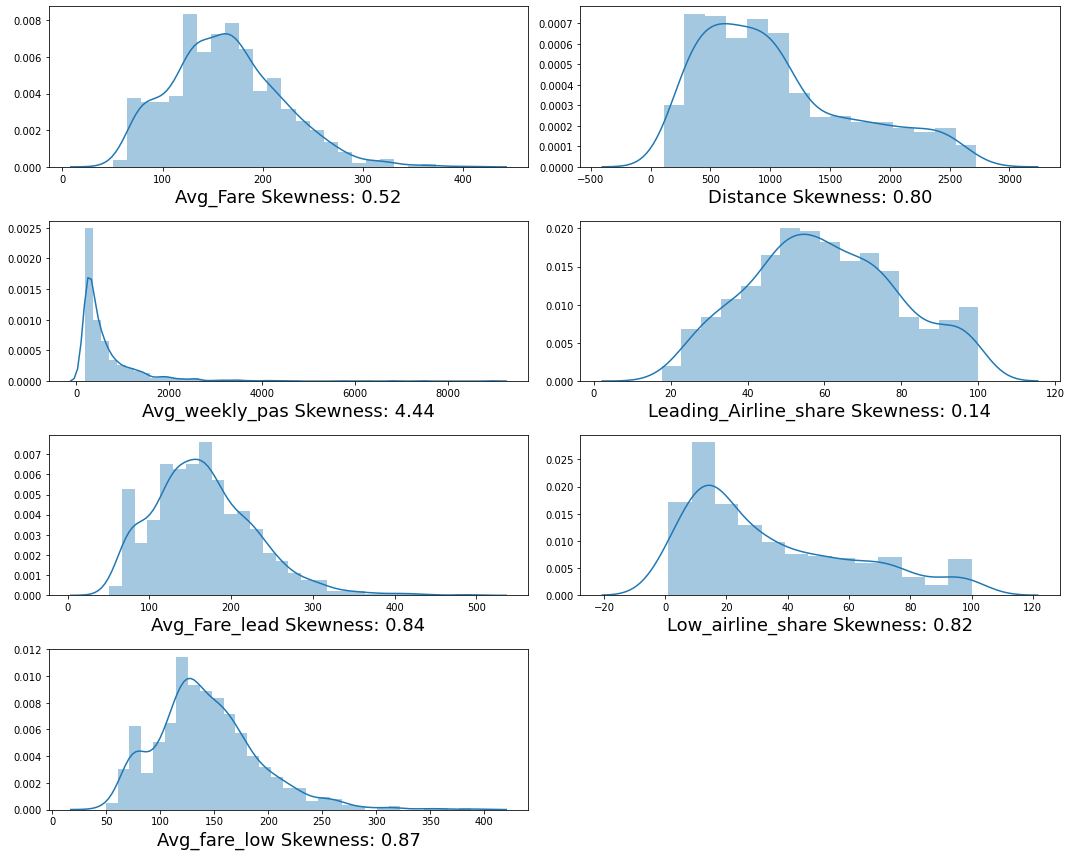

In [13]:
t= 1
plt.figure(figsize=(15,12))
print('\t\tUNIVARIATE ANALYSIS (NUMERIC COLUMNS)')
for i in num_cols:
    plt.subplot(4,2,t)
    sns.distplot(data[i])
    plt.xlabel('%s Skewness: %.2f'%(i,data[i].skew()),fontsize=18)
    t+=1
plt.tight_layout()
plt.show()
    

		UNIVARIATE ANALYSIS (NUMERIC COLUMNS)


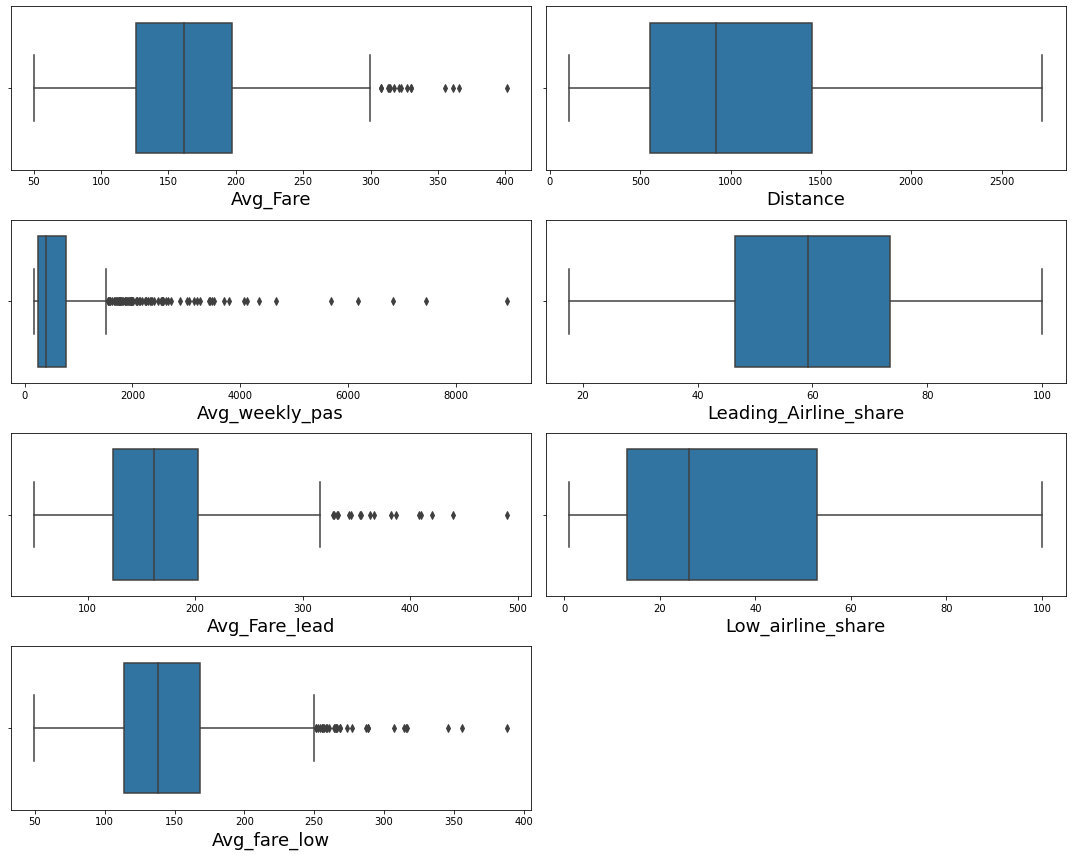

In [14]:
t= 1
plt.figure(figsize=(15,12))
print('\t\tUNIVARIATE ANALYSIS (NUMERIC COLUMNS)')
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    plt.xlabel(i,fontsize=18)
    t+=1
plt.tight_layout()
plt.show()

In [15]:
cat_cols = data.select_dtypes(include='object').columns

In [16]:
cat_cols

Index(['City1', 'City2', 'Leading_Airline', 'Low_price_Airline'], dtype='object')

		UNIVARIATE ANALYSIS (CATEGORICAL COLUMNS)


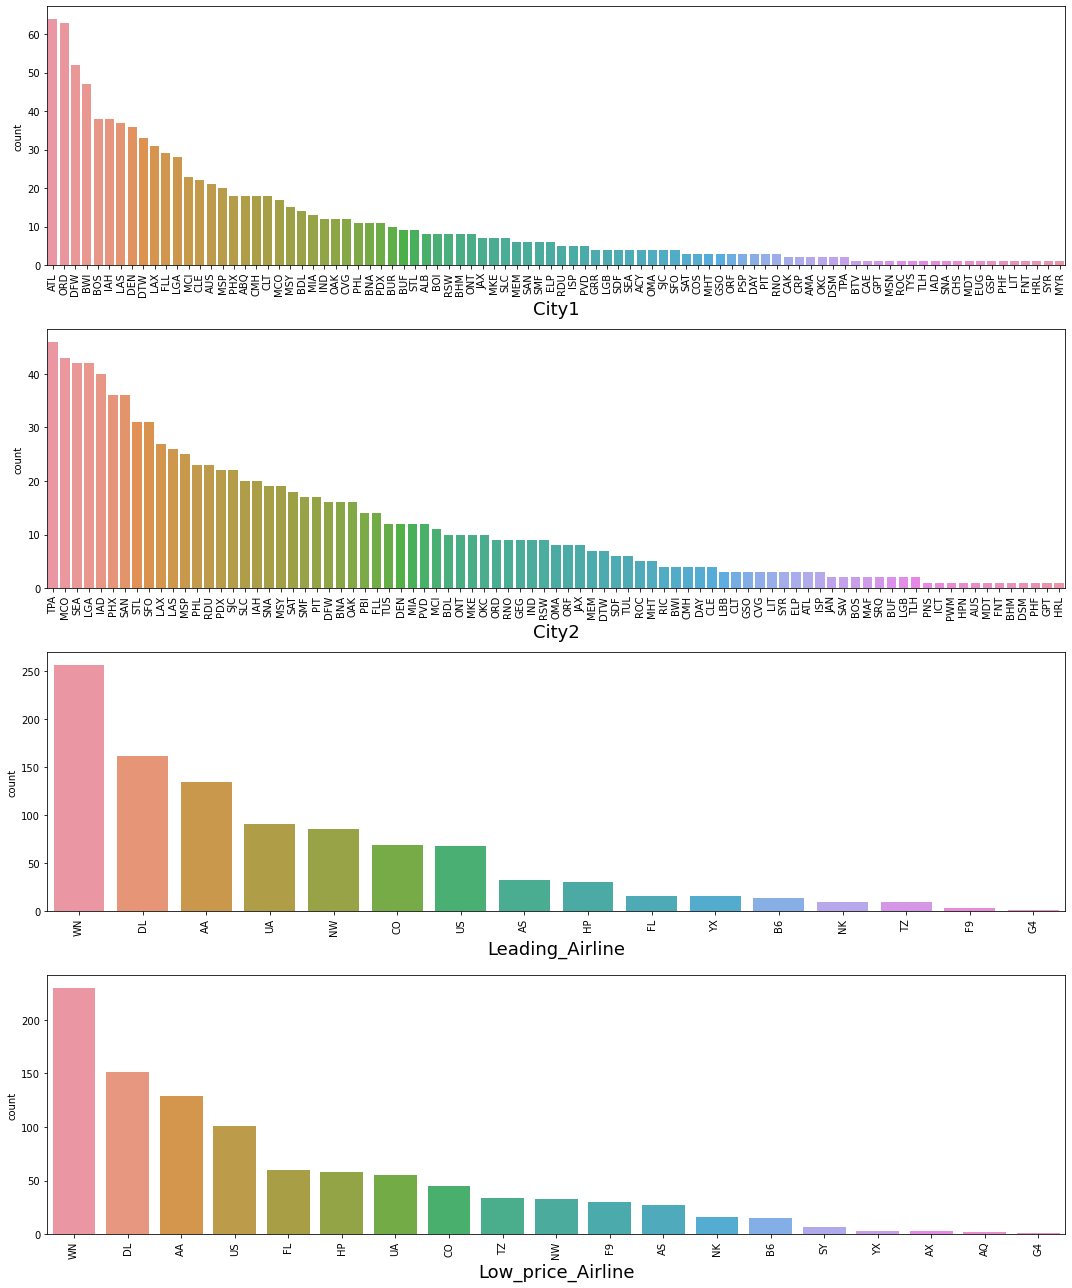

In [17]:
t= 1
plt.figure(figsize=(15,18))
print('\t\tUNIVARIATE ANALYSIS (CATEGORICAL COLUMNS)')
for i in cat_cols:
    plt.subplot(4,1,t)
    ord_c = data[i].value_counts().sort_values(ascending=False).index
    sns.countplot(data[i],order=ord_c)
    plt.xlabel(i,fontsize=18)
    plt.xticks(rotation='vertical')
    t+=1
plt.tight_layout()
plt.show()

### BIVARIATE ANALYSIS

In [18]:
cat_cols

Index(['City1', 'City2', 'Leading_Airline', 'Low_price_Airline'], dtype='object')

In [19]:
num_cols

Index(['Avg_Fare', 'Distance', 'Avg_weekly_pas', 'Leading_Airline_share',
       'Avg_Fare_lead', 'Low_airline_share', 'Avg_fare_low'],
      dtype='object')

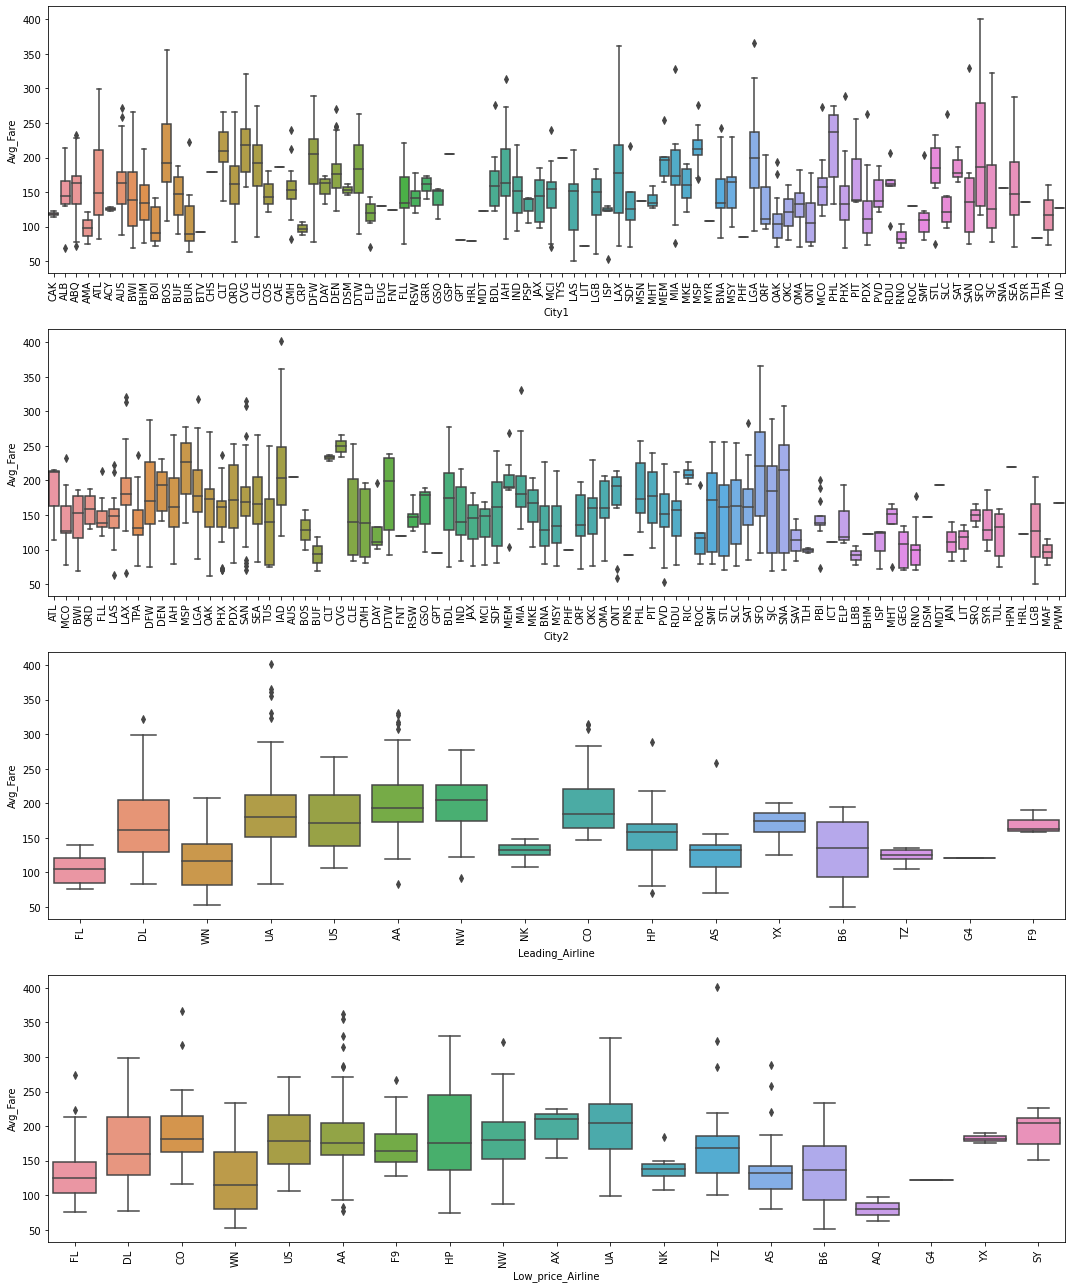

In [20]:
t=1
plt.figure(figsize=(15,18))
for i in cat_cols:
    plt.subplot(4,1,t)
    sns.boxplot(x=data[i],y=data['Avg_Fare'])
    plt.xticks(rotation='vertical')
    t+=1
plt.tight_layout()
plt.show()

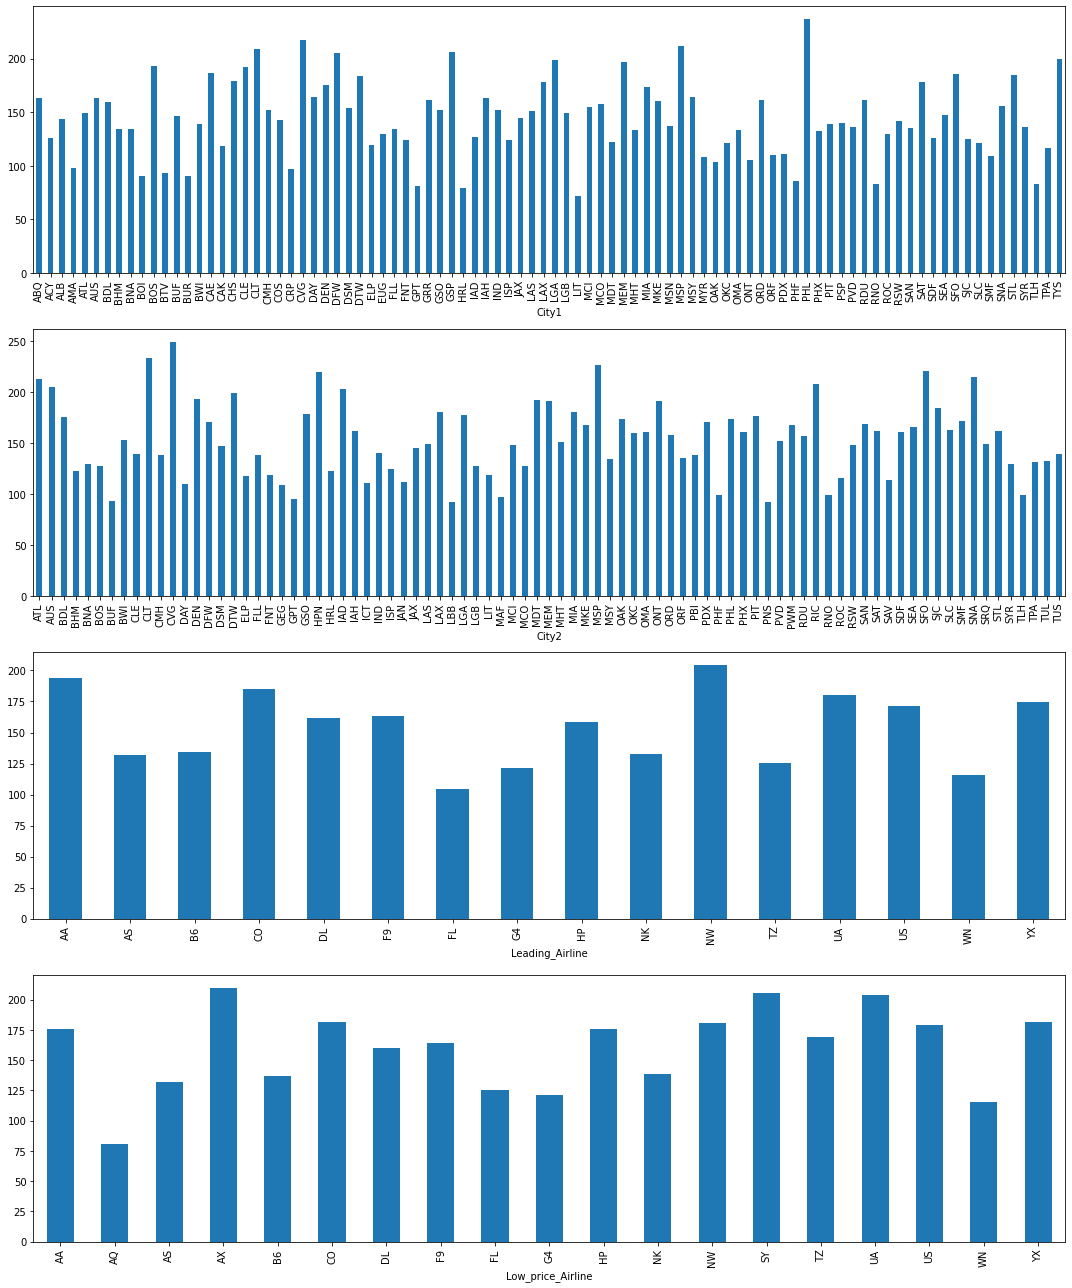

In [21]:
t=1
plt.figure(figsize=(15,18))
for i in cat_cols:
    plt.subplot(4,1,t)
    data.groupby(by=[i])['Avg_Fare'].median().plot(kind='bar')
    plt.xticks(rotation='vertical')
    t+=1
plt.tight_layout()
plt.show()

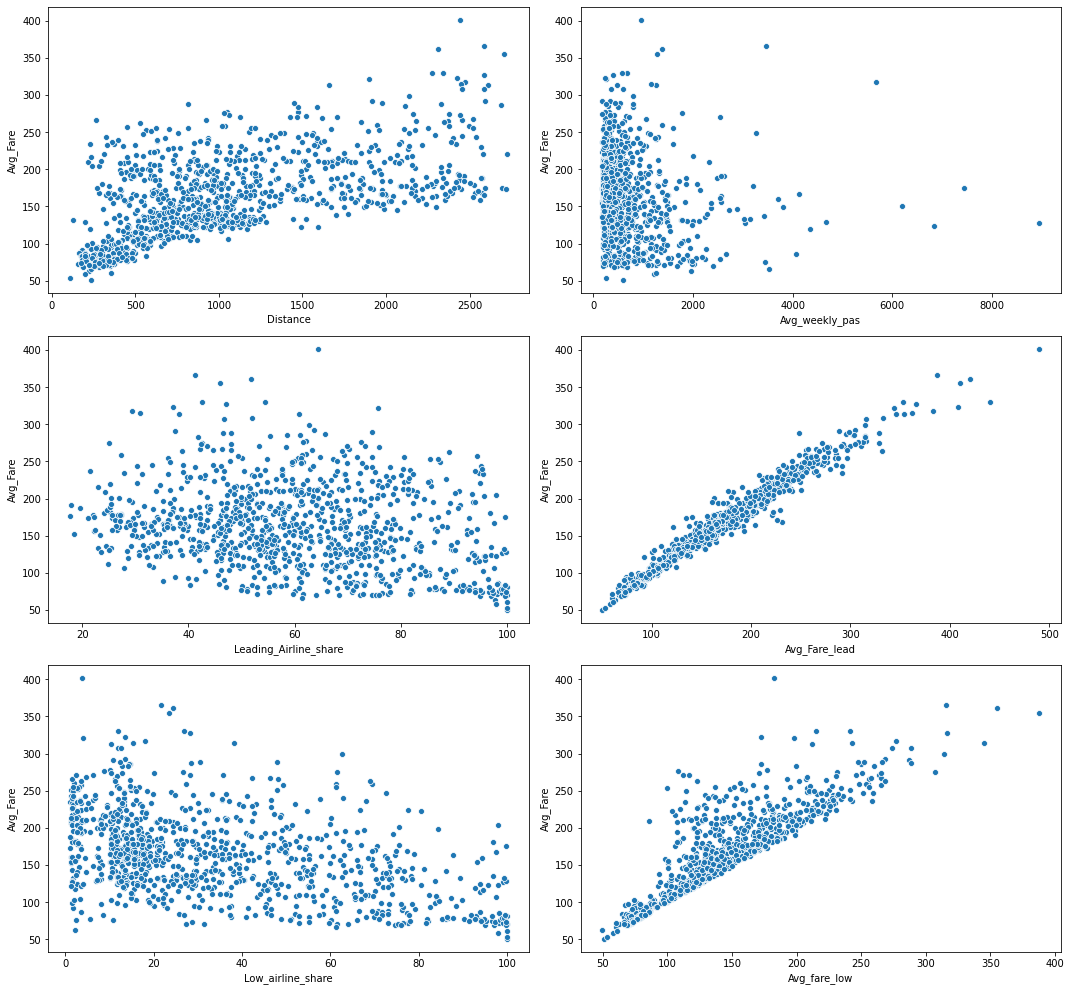

In [22]:
t=1
plt.figure(figsize=(15,18))
for i in num_cols:
    if i != 'Avg_Fare':
        plt.subplot(4,2,t)
        sns.scatterplot(x=data[i],y=data['Avg_Fare'])
        t+=1
plt.tight_layout()
plt.show()

#### Correlation in the dataset

<AxesSubplot:>

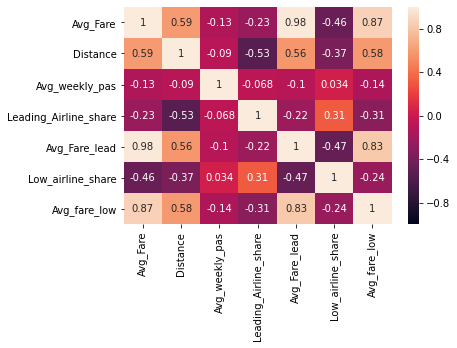

In [23]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

<AxesSubplot:>

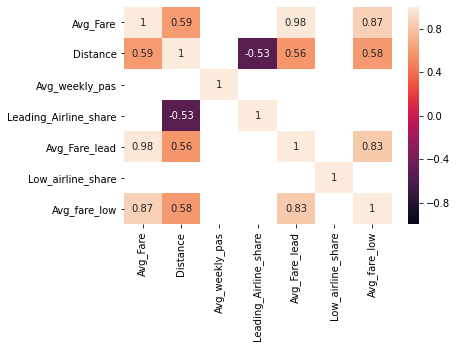

In [24]:
sns.heatmap(data.corr()[(data.corr()>0.5)|(data.corr()<-0.5)],annot=True,vmax=1,vmin=-1)

In [25]:
data

,City1,City2,Avg_Fare,Distance,Avg_weekly_pas,Leading_Airline,Leading_Airline_share,Avg_Fare_lead,Low_price_Airline,Low_airline_share,Avg_fare_low
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


### Outlier treatment

In [26]:
# capping

for i in num_cols:
    if i !='Avg_Fare':
        q1,q3 = np.quantile(data[i],[0.25,0.75])
        iqr = q3-q1
        ul = q3+(1.5*iqr)
        ll = q1-(1.5*iqr)

        data.loc[data[i]>ul,i]=ul
        data.loc[data[i]<ll,i]=ll

		UNIVARIATE ANALYSIS (NUMERIC COLUMNS)


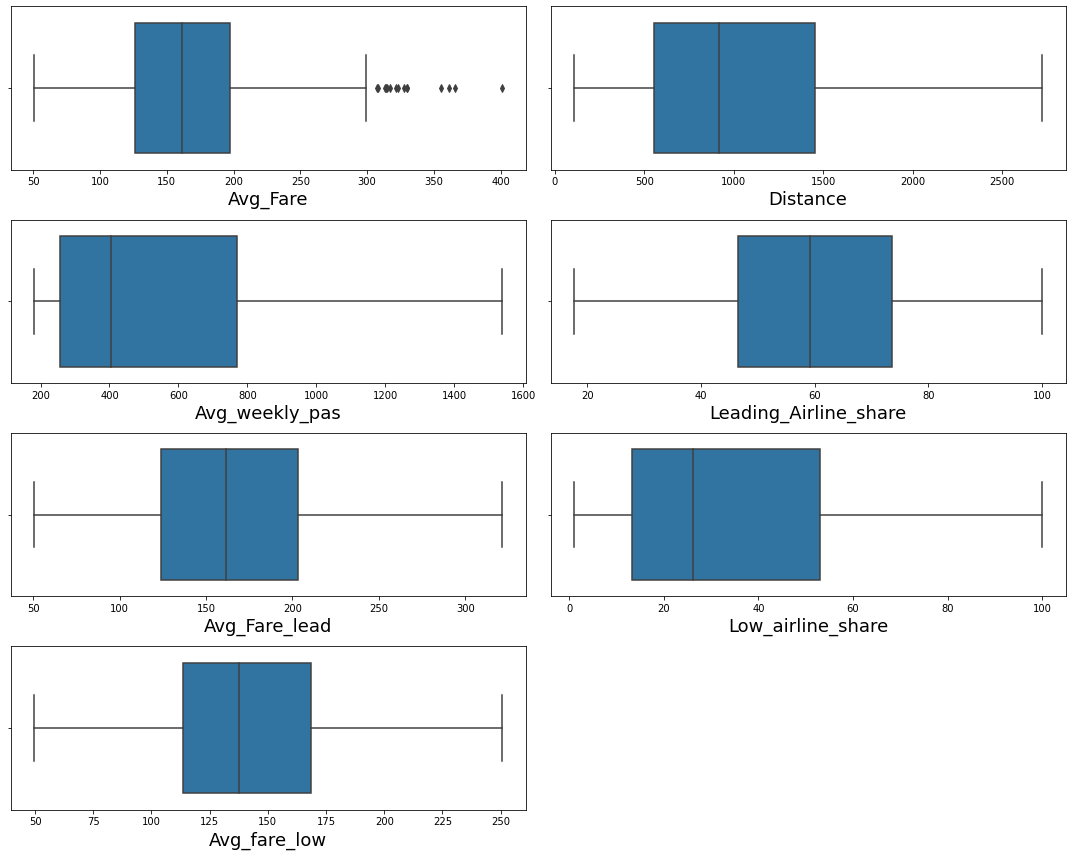

In [27]:
t= 1
plt.figure(figsize=(15,12))
print('\t\tUNIVARIATE ANALYSIS (NUMERIC COLUMNS)')
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    plt.xlabel(i,fontsize=18)
    t+=1
plt.tight_layout()
plt.show()

### Significance test

In [28]:
import scipy.stats as st

In [29]:
sig_features = []
for i in num_cols:
    if i!= 'Avg_Fare':
        if st.mannwhitneyu(data[i],data['Avg_Fare'])[1]<0.05:
            print(i,st.mannwhitneyu(data[i],data['Avg_Fare'])[1])
            sig_features.append(i)
            
print(sig_features)

Distance 0.0
Avg_weekly_pas 6.244133011897348e-269
Leading_Airline_share 1.86185897448131e-298
Low_airline_share 0.0
Avg_fare_low 3.7699511528208936e-19
['Distance', 'Avg_weekly_pas', 'Leading_Airline_share', 'Low_airline_share', 'Avg_fare_low']


In [30]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [31]:
for i in cat_cols:
    mod = ols('Avg_Fare~%s'%i,data=data).fit()
    aov = sm.stats.anova_lm(mod)
    print(aov)

             df        sum_sq      mean_sq         F        PR(>F)
City1      89.0  8.232983e+05  9250.542997  3.759759  2.252026e-24
Residual  910.0  2.238972e+06  2460.408391       NaN           NaN
             df        sum_sq      mean_sq         F        PR(>F)
City2      84.0  7.535265e+05  8970.553730  3.555205  2.485907e-21
Residual  915.0  2.308743e+06  2523.216884       NaN           NaN
                    df        sum_sq       mean_sq          F        PR(>F)
Leading_Airline   15.0  1.227403e+06  81826.851734  43.881989  1.717503e-98
Residual         984.0  1.834867e+06   1864.702425        NaN           NaN
                      df        sum_sq       mean_sq          F        PR(>F)
Low_price_Airline   18.0  7.597578e+05  42208.769381  17.983316  2.431533e-49
Residual           981.0  2.302512e+06   2347.107150        NaN           NaN


In [32]:
cat_cols

Index(['City1', 'City2', 'Leading_Airline', 'Low_price_Airline'], dtype='object')

In [33]:
# Normality
norm_features = []
for i in num_cols:
    _,p_val = st.shapiro(data[i])
    if p_val> 0.05:
        print(i,p_val)
        norm_features.append(i)
        
print(norm_features)

[]


### Categorical treatment

In [34]:
#d = data['City1'].value_counts(normalize=True).to_dict()

In [35]:
#data['City1'] = data['City1'].map(d)

In [36]:
#data

In [37]:
def cat_treat(x):
    if x in top_10:
        return 1
    else:
        return 0

In [38]:
for i in cat_cols:
    top_10 = data[i].value_counts().sort_values(ascending=False)[:10].index
    data[i] = data[i].apply(cat_treat)

In [39]:
data

,City1,City2,Avg_Fare,Distance,Avg_weekly_pas,Leading_Airline,Leading_Airline_share,Avg_Fare_lead,Low_price_Airline,Low_airline_share,Avg_fare_low
0,0,0,114.47,528.0,424.56,1,70.19,111.03,1,70.19,111.03
1,0,1,122.47,860.0,276.84,1,75.10,123.09,1,17.23,118.94
2,0,0,214.42,852.0,215.76,1,78.89,223.98,1,2.77,167.12
3,0,0,69.40,288.0,606.84,1,96.97,68.86,1,96.97,68.86
4,0,0,158.13,723.0,313.04,1,39.79,161.36,1,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,136.16,1104.0,184.34,1,33.37,135.82,1,28.65,118.51
996,0,1,83.28,200.0,232.71,1,99.57,82.55,1,99.57,82.55
997,0,1,159.97,814.0,843.80,1,46.19,159.65,1,13.89,159.02
998,0,0,73.57,174.0,214.45,1,99.74,73.44,1,99.74,73.44


### Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x = data.drop(columns=['Avg_Fare'])
y = data['Avg_Fare']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=2)

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 10), (300, 10), (700,), (300,))

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
for i in num_cols:
    if i != 'Avg_Fare':
        x_train[i] = sc.fit_transform(pd.DataFrame(x_train[i]))
        x_test[i] = sc.fit_transform(pd.DataFrame(x_test[i]))

In [47]:
x_train

,City1,City2,Distance,Avg_weekly_pas,Leading_Airline,Leading_Airline_share,Avg_Fare_lead,Low_price_Airline,Low_airline_share,Avg_fare_low
90,1,1,-1.017894,2.127967,1,0.578026,-0.577173,1,-0.265091,-0.487698
305,1,0,1.140301,-0.454246,1,0.009875,1.025712,1,-0.747212,0.470526
126,1,0,0.246771,0.463589,1,0.320770,0.979437,1,-1.222642,-0.305908
963,0,1,-0.295896,-0.333799,1,0.121318,-0.196143,1,1.032211,0.272089
163,1,1,-0.338000,1.147735,1,-0.251547,-0.624432,1,-0.269552,-0.600900
...,...,...,...,...,...,...,...,...,...,...
534,0,0,2.548430,-0.951414,1,-0.616080,0.143206,1,-0.632722,0.198397
584,1,0,-0.899380,-0.547452,1,0.305668,-1.029256,1,1.163799,-0.854828
493,1,0,1.394482,-0.850506,1,-0.016684,1.166834,1,-0.828247,0.818123
527,0,1,0.026897,2.251922,1,-1.515956,-0.718131,0,-0.760966,-0.669931


In [48]:
X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)

In [49]:
X_test

,const,City1,City2,Distance,Avg_weekly_pas,Leading_Airline,Leading_Airline_share,Avg_Fare_lead,Low_price_Airline,Low_airline_share,Avg_fare_low
37,1.0,1,0,-0.771465,-0.292294,1,-0.141683,0.344735,1,0.840340,0.960320
726,1.0,1,0,-1.025103,0.301014,1,-0.121378,-1.177879,1,0.082131,-1.383442
846,1.0,0,1,-1.274101,2.302477,1,-0.657428,-0.997004,1,0.470873,-0.807088
295,1.0,1,1,-0.073962,2.302477,0,-1.295511,-1.121611,1,0.013765,-0.971226
924,1.0,0,1,-0.278109,-0.092609,1,0.616707,-0.580229,1,1.383632,-0.258090
...,...,...,...,...,...,...,...,...,...,...,...
894,1.0,0,1,1.580868,0.160178,1,-0.944236,0.579570,1,0.265411,1.269657
540,1.0,0,1,2.573767,-0.571140,1,-1.093984,0.144690,1,-0.593529,0.401502
567,1.0,0,0,0.349798,-0.940547,1,-0.978246,-0.688505,1,-0.397522,-0.463847
641,1.0,0,0,-0.561132,-0.753101,1,-1.824962,-1.137408,1,-0.725897,-1.065220


### Base Model

In [50]:
base_model = sm.OLS(y_train,X_train).fit()

In [51]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg_Fare   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2189.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:57:03   Log-Likelihood:                -2593.4
No. Observations:                 700   AIC:                             5209.
Df Residuals:                     689   BIC:                             5259.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   168.2852      1.858     90.575      0.000     164.637     171.933
City1                     0.0320      0.876      0.037      0.971      -1.687       1.751
City2                    -0.4367      0.884     -0.494      0.622      -2.173       1.300
Distance                  2.4364      0.543      4.484      0.000       1.370       3.503
Avg_weekly_pas           -0.4633      0.425     -1.089      0.276      -1.298       0.372
Leading_Airline          -6.6482      1.770     -3.757      0.000     -10.123      -3.173
Leading_Airline_share     1.0350      0.477      2.169      0.030       0.098       1.972
Avg_Fare_lead            47.6590      0.826     57.682      0.000      46.037      49.281
Low_price_Airline         2.4172      1.294      1.868      0.062      -0.123       4.957
Low_airline_share        -0.3470      0.493     -0.705      0.481      -1.314       0.620
Avg_fare_low              7.6427      0.770      9.922      0.000       6.130       9.155
==============================================================================
Omnibus:                      443.638   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13348.647
Skew:                           2.325   Prob(JB):                         0.00
Kurtosis:                      23.882   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

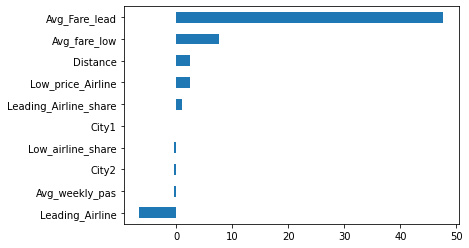

In [52]:
base_model.params[1:].sort_values().plot(kind='barh')

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
numeric = x_train.select_dtypes(include=np.number)

In [80]:
vif = [variance_inflation_factor(numeric.values,i)for i in range(numeric.shape[1])]

In [81]:
pd.DataFrame({'VIF':vif},index=numeric.columns).sort_values(by='VIF',ascending=False)

,VIF
Leading_Airline,10.401154
Low_price_Airline,9.295891
Avg_Fare_lead,4.841085
Avg_fare_low,4.226638
City1,2.287882
Distance,2.102193
City2,2.044693
Low_airline_share,1.719389
Leading_Airline_share,1.621502
Avg_weekly_pas,1.288069


In [82]:
resid = base_model.resid

In [83]:
resid

90    -0.888933
305   -9.794867
126    7.320113
963    0.589886
163   -2.685024
         ...   
534   -4.147287
584   -1.944619
493   -4.180702
527    7.988046
168    2.682900
Length: 700, dtype: float64

<AxesSubplot:>

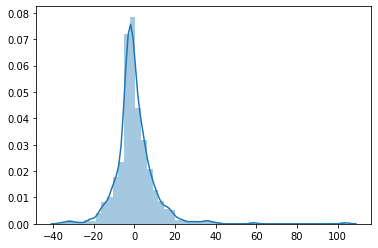

In [84]:
sns.distplot(resid)

In [85]:
from statsmodels.graphics.gofplots import qqplot

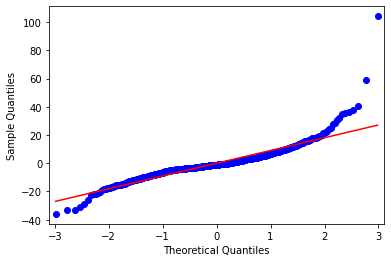

In [87]:
qqplot(resid,line='r')
plt.show()

In [88]:
# Shapiro test

In [91]:
y_pred_train = base_model.predict(X_train)

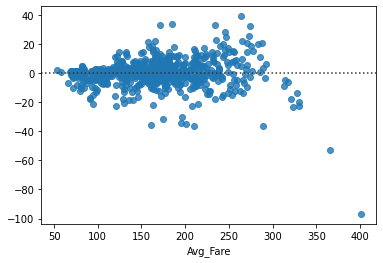

In [93]:
sns.residplot(y_train,y_pred_train)
plt.show()

In [90]:
# Breuch-pagan test
# Ho: Homoscedasticity is present
# Ha: Hetroscadasticity is present

In [94]:
import statsmodels.stats.api as sst

In [95]:
_,p_value,_,_ = sst.het_breuschpagan(resid,base_model.model.exog)
print(p_value)

2.342061529429225e-10


#### Prediction

In [96]:
y_pred = base_model.predict(X_test)

In [97]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [99]:
def validation(test,pred):
    r2 = r2_score(test,pred)
    print('R-Square: ',r2)
    n = x_test.shape[0]
    k = x_test.shape[1]
    adj_r2= 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted R2: ',adj_r2)
    print('MSE: ',mean_squared_error(test,pred))
    print('RMSE: ',mean_squared_error(test,pred)**0.5)
    print('MAPE: ',mean_absolute_percentage_error(test,pred))

In [100]:
validation(y_test,y_pred)

R-Square:  0.9651639628710804
Adjusted R2:  0.9639585636624672
MSE:  97.77513948061508
RMSE:  9.888131243092149
MAPE:  0.041244663740101196


In [102]:
resid_test = y_test-y_pred

<AxesSubplot:>

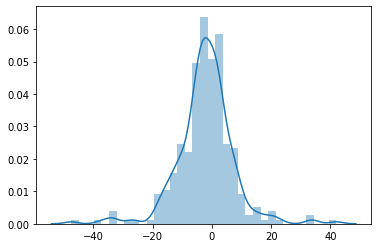

In [103]:
sns.distplot(resid_test)

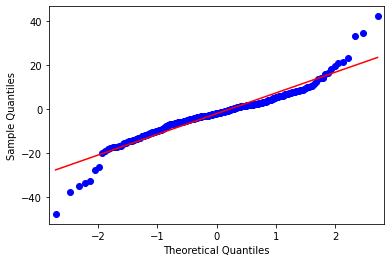

In [104]:
qqplot(resid_test,line='r')
plt.show()

### Try Other models

In [105]:
from sklearn.linear_model import SGDRegressor,Lasso,Ridge,ElasticNet

In [107]:
def model(model,trainx,trainy,testx,testy):
    print('%s'%model)
    model.fit(trainx,trainy)
    ypred = model.predict(testx)
    validation(testy,ypred)
    print()

In [111]:
model(SGDRegressor(),x_train,y_train,x_test,y_test)

SGDRegressor()
R-Square:  0.9654973785743741
Adjusted R2:  0.9643035162413075
MSE:  96.83933364328846
RMSE:  9.840697822984326
MAPE:  0.04057164086414189



In [116]:
model(Ridge(alpha=10),x_train,y_train,x_test,y_test)

Ridge(alpha=10)
R-Square:  0.9669385337740075
Adjusted R2:  0.9657945384028659
MSE:  92.79440883924413
RMSE:  9.632985458270147
MAPE:  0.041007802127722995



In [117]:
model(Lasso(alpha=10),x_train,y_train,x_test,y_test)

Lasso(alpha=10)
R-Square:  0.9481687151504242
Adjusted R2:  0.946375245086425
MSE:  145.47610817131786
RMSE:  12.061347692995085
MAPE:  0.06313046332325543



In [118]:
model(ElasticNet(alpha=10,l1_ratio=0.3),x_train,y_train,x_test,y_test)

ElasticNet(alpha=10, l1_ratio=0.3)
R-Square:  0.40913402738712434
Adjusted R2:  0.38868883802335696
MSE:  1658.3976722947325
RMSE:  40.723429034092064
MAPE:  0.23614124026411035



### Tune Hyperparametrs

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
params = {'alpha':[0.001,0.01,0.1,1,10,100],
         'l1_ratio':[0.25,0.5,0.75]}

In [121]:
gscv = GridSearchCV(estimator=ElasticNet(),
                   param_grid = params,
                   scoring='r2',
                   cv=3,
                   verbose=3)

In [122]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END ........alpha=0.001, l1_ratio=0.25;, score=0.968 total time=   0.0s
[CV 2/3] END ........alpha=0.001, l1_ratio=0.25;, score=0.966 total time=   0.0s
[CV 3/3] END ........alpha=0.001, l1_ratio=0.25;, score=0.968 total time=   0.0s
[CV 1/3] END .........alpha=0.001, l1_ratio=0.5;, score=0.968 total time=   0.0s
[CV 2/3] END .........alpha=0.001, l1_ratio=0.5;, score=0.966 total time=   0.0s
[CV 3/3] END .........alpha=0.001, l1_ratio=0.5;, score=0.968 total time=   0.0s
[CV 1/3] END ........alpha=0.001, l1_ratio=0.75;, score=0.968 total time=   0.0s
[CV 2/3] END ........alpha=0.001, l1_ratio=0.75;, score=0.966 total time=   0.0s
[CV 3/3] END ........alpha=0.001, l1_ratio=0.75;, score=0.968 total time=   0.0s
[CV 1/3] END .........alpha=0.01, l1_ratio=0.25;, score=0.969 total time=   0.0s
[CV 2/3] END .........alpha=0.01, l1_ratio=0.25;, score=0.966 total time=   0.0s
[CV 3/3] END .........alpha=0.01, l1_ratio=0.25;

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.25, 0.5, 0.75]},
             scoring='r2', verbose=3)

In [123]:
gscv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.75}

In [124]:
gscv.best_score_

0.9674030967141554

In [128]:
model(ElasticNet(**gscv.best_params_),x_train,y_train,x_test,y_test)

ElasticNet(alpha=0.01, l1_ratio=0.75)
R-Square:  0.965581664863077
Adjusted R2:  0.9643907190105883
MSE:  96.60276529873977
RMSE:  9.828670576366866
MAPE:  0.041102853536387714

